In [2]:
!pip install ultralytics


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import ultralytics
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
ultralytics.checks()

Ultralytics 8.3.38 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
Setup complete ✅ (16 CPUs, 60.5 GB RAM, 71.1/99.4 GB disk)


In [4]:
import torch
torch.cuda.is_available()

True

In [8]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source='dog.jpg'

100%|████████████████████████████████████████| 131M/131M [00:01<00:00, 83.1MB/s]
Ultralytics 8.3.38 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

image 1/1 /opt/app-root/src/demo-project/notebook/dog.jpg: 640x608 1 dog, 42.6ms
Speed: 4.0ms preprocess, 42.6ms inference, 77.8ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [9]:
def show(img):
    fig = plt.gcf()
    fig.set_size_inches(16,10)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

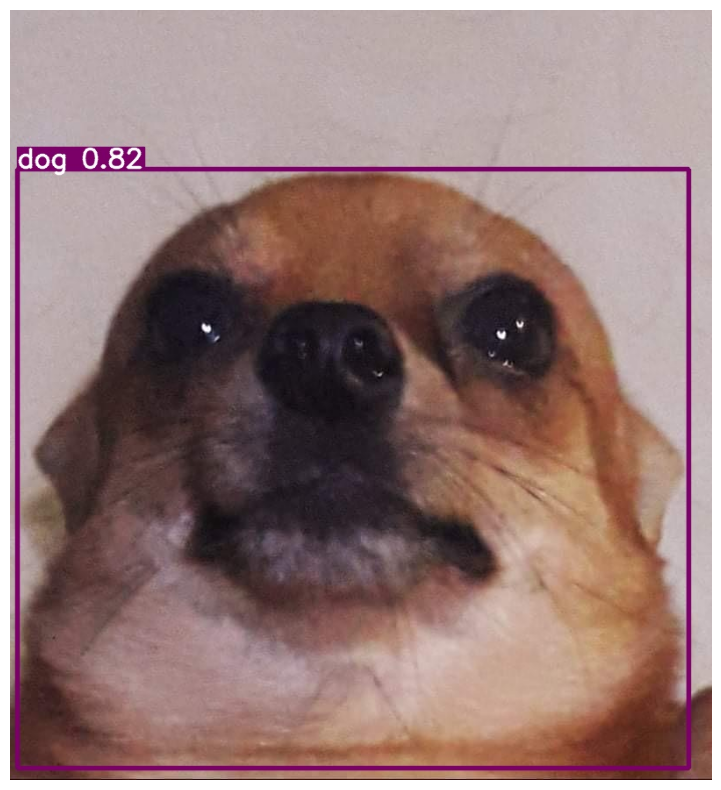

In [10]:
resultado = cv2.imread('runs/detect/predict2/dog.jpg')
show(resultado)

In [14]:
# trabalhar com o threshold é essencial para o caso do navai
!yolo task=detect mode=predict model=yolov8x.pt source='gangue-caramelo.jpeg'

Ultralytics 8.3.38 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
YOLOv8x summary (fused): 268 layers, 68,200,608 parameters, 0 gradients, 257.8 GFLOPs

image 1/1 /opt/app-root/src/demo-project/notebook/gangue-caramelo.jpeg: 384x640 1 bicycle, 7 dogs, 40.3ms
Speed: 3.0ms preprocess, 40.3ms inference, 68.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [5]:
from ultralytics import YOLO

In [6]:
model = YOLO('yolov8x.pt')

In [12]:
caminho_img = 'gangue-caramelo.jpeg'
img = cv2.imread(caminho_img)
resultados = model.predict(source=img)


0: 384x640 1 bicycle, 7 dogs, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)


In [13]:
resultados

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [17]:
for r in resultados:
    print(r.boxes.data)
    
for r in resultados:
    print(r.boxes.conf)

tensor([[1.1306e+03, 3.1744e+02, 1.3905e+03, 4.6894e+02, 9.0067e-01, 1.6000e+01],
        [1.0114e+03, 3.5750e+02, 1.1436e+03, 6.0976e+02, 8.9563e-01, 1.6000e+01],
        [8.7101e+02, 2.6280e+02, 1.0508e+03, 4.2728e+02, 8.5201e-01, 1.6000e+01],
        [5.5447e+02, 4.0608e+02, 6.7959e+02, 5.9776e+02, 8.4915e-01, 1.6000e+01],
        [8.8958e+02, 4.0189e+02, 1.0267e+03, 6.3040e+02, 8.3208e-01, 1.6000e+01],
        [2.6869e+01, 6.4123e+02, 2.0980e+02, 7.6061e+02, 6.3725e-01, 1.6000e+01],
        [7.1146e+02, 3.5319e+02, 8.8984e+02, 5.8496e+02, 6.2806e-01, 1.0000e+00],
        [9.0814e+02, 5.9686e+02, 1.1240e+03, 7.5263e+02, 5.1880e-01, 1.6000e+01]], device='cuda:0')
tensor([0.9007, 0.8956, 0.8520, 0.8492, 0.8321, 0.6372, 0.6281, 0.5188], device='cuda:0')


# Validação

Com a validação eu consigo obter o a precisão mAP do meu modelo treinado. É necessário ter uma base de dados de validação no formato do yolov8 pois ele espera que alguns arquivos estejam nos locais corretos. Segue código que faz a validação.

In [ ]:
!yolo task=detect mode=val model=yolov8x.pt data=arquivo.yaml